# Sales Performance Analysis Project

## Project Overview
This project analyzes retail sales data to uncover insights about:
- Sales trends and patterns
- Product performance
- Customer behavior
- Geographic distribution

## Dataset
- Source: Online Retail Dataset (UCI ML Repository)
- Sample: 25,000 transactions
- Columns: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:

use_columns = ["InvoiceNo", "StockCode", "Description", "Quantity", "InvoiceDate", "UnitPrice", "CustomerID", "Country"]
sales = pd.read_excel("Online Retail.xlsx", usecols=use_columns, nrows=25_000)

### Checking Data Structure


In [3]:
sales.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
sales.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24990,538351,21976,PACK OF 60 MUSHROOM CAKE CASES,6,2010-12-10 15:17:00,2.13,NaN,United Kingdom
24991,538351,21989,PACK OF 20 SKULL PAPER NAPKINS,2,2010-12-10 15:17:00,2.51,NaN,United Kingdom
24992,538351,22069,BROWN PIRATE TREASURE CHEST,2,2010-12-10 15:17:00,4.21,NaN,United Kingdom
24993,538351,22075,6 RIBBONS ELEGANT CHRISTMAS,2,2010-12-10 15:17:00,4.21,NaN,United Kingdom
24994,538351,22077,6 RIBBONS RUSTIC CHARM,11,2010-12-10 15:17:00,4.21,NaN,United Kingdom
24995,538351,22078,RIBBON REEL LACE DESIGN,2,2010-12-10 15:17:00,4.81,NaN,United Kingdom
24996,538351,22080,RIBBON REEL POLKADOTS,1,2010-12-10 15:17:00,4.21,NaN,United Kingdom
24997,538351,22081,RIBBON REEL FLORA + FAUNA,1,2010-12-10 15:17:00,4.21,NaN,United Kingdom
24998,538351,22082,RIBBON REEL STRIPES DESIGN,3,2010-12-10 15:17:00,4.21,NaN,United Kingdom
24999,538351,22083,PAPER CHAIN KIT RETROSPOT,23,2010-12-10 15:17:00,6.77,NaN,United Kingdom


In [5]:

sales.shape

(25000, 8)

In [6]:
sales.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
sales.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    25000 non-null  object        
 1   StockCode    25000 non-null  object        
 2   Description  24889 non-null  object        
 3   Quantity     25000 non-null  int64         
 4   InvoiceDate  25000 non-null  datetime64[ns]
 5   UnitPrice    25000 non-null  float64       
 6   CustomerID   16056 non-null  float64       
 7   Country      25000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.5+ MB


### Unique Value Counts


In [9]:
sales['InvoiceNo'].nunique(), sales['StockCode'].nunique(), sales['Country'].nunique(), sales['CustomerID'].nunique()


(1166, 2540, 18, 654)

## Deep Data Exploration and Data Quality Check

In [10]:
sales["InvoiceNo"].value_counts().head()

InvoiceNo
537434    675
538071    652
538349    620
537638    601
537237    597
Name: count, dtype: int64

In [11]:
sales["StockCode"].value_counts().head()

StockCode
85123A    132
22086     120
22867     110
22423     104
22633      98
Name: count, dtype: int64

In [12]:
sales["Description"].value_counts().head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    134
PAPER CHAIN KIT 50'S CHRISTMAS        120
HAND WARMER BIRD DESIGN               110
REGENCY CAKESTAND 3 TIER              103
HAND WARMER UNION JACK                 98
Name: count, dtype: int64

In [13]:
sales[sales["Quantity"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
24932,C538350,82551,LAUNDRY 15C METAL SIGN,-1,2010-12-10 15:01:00,1.25,13798.0,United Kingdom
24933,C538350,35924,HANGING FAIRY CAKE DECORATION,-15,2010-12-10 15:01:00,1.69,13798.0,United Kingdom
24934,C538350,22064,PINK DOUGHNUT TRINKET POT,-4,2010-12-10 15:01:00,1.45,13798.0,United Kingdom
24935,C538350,22065,CHRISTMAS PUDDING TRINKET POT,-4,2010-12-10 15:01:00,1.25,13798.0,United Kingdom


In [14]:
sales[sales["UnitPrice"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [15]:
sales["CustomerID"].isnull().sum()

8944

In [16]:
sales["Description"].isnull().sum()

111

In [17]:
sales.duplicated().sum()

352

In [18]:
sales['InvoiceDate'].min(), sales['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2010-12-10 15:17:00'))

In [19]:
sales['Quantity'].describe()

count    25000.000000
mean         7.252680
std         70.411142
min      -9360.000000
25%          1.000000
50%          2.000000
75%          6.000000
max       2880.000000
Name: Quantity, dtype: float64

In [20]:
sales['UnitPrice'].describe()

count    25000.000000
mean         7.108175
std        181.004981
min          0.000000
25%          1.450000
50%          2.510000
75%          4.250000
max      13541.330000
Name: UnitPrice, dtype: float64

In [21]:
sales['CustomerID'].isnull().sum()

8944


  
### Initial Observations

- The dataset contains 25,000 transactions with 8 columns.
- The `InvoiceDate` column is correctly parsed as datetime.
- Some missing values are present in `Description` and `CustomerID`.
- Memory usage is approximately **1.5 MB**.
- There are 1166 unique invoices, 2540 unique products, 18 unique countries, and 654 unique customers.

### Data Quality Issues Identified:
- **Missing CustomerID**: 8,944 rows (35.8%)
- **Returns**: 464 negative quantities
- **Missing descriptions**: 111 rows (0.4%)
- **Duplicates**: 352 rows (1.4%)
- **Zero prices**: Some products with £0.00 price


## Data Cleaning and Feature Engineering

In [22]:
sales["Description"] = sales["Description"].fillna("Unknow Product")

In [23]:
sales["CustomerID"] = sales["CustomerID"].fillna("GUEST_CUSTOMER")

In [24]:
negative_count = sales[sales["Quantity"] < 0].shape[0]
percentage = (464 / len(sales)) * 100
print(f"Percentage: {percentage:.2f}%")

Percentage: 1.86%


In [25]:
sales = sales[sales["Quantity"] > 0]

In [26]:
sales.shape

(24536, 8)

In [27]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24536 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    24536 non-null  object        
 1   StockCode    24536 non-null  object        
 2   Description  24536 non-null  object        
 3   Quantity     24536 non-null  int64         
 4   InvoiceDate  24536 non-null  datetime64[ns]
 5   UnitPrice    24536 non-null  float64       
 6   CustomerID   24536 non-null  object        
 7   Country      24536 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 1.7+ MB


 - create new columns

In [28]:
sales["TotalAmount"] = sales["Quantity"] * sales["UnitPrice"]

In [29]:
sales["Date"] = sales["InvoiceDate"].dt.date

In [30]:
sales["Hour"] = sales["InvoiceDate"].dt.hour

In [31]:
sales['DayOfWeek'] = sales["InvoiceDate"].dt.day_name()

## Optimize Memory Usage


In [32]:
sales["StockCode"] = sales["StockCode"].astype("category")

In [33]:
sales["Description"] =  sales["Description"].astype("category")

In [34]:
sales["Country"] =  sales["Country"].astype("category")

In [35]:
sales["InvoiceNo"] = sales["InvoiceNo"].astype("category")

In [36]:
sales['CustomerID'] = sales['CustomerID'].astype('category')

In [37]:
sales['DayOfWeek'] = sales['DayOfWeek'].astype('category')

In [38]:
print(sales.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
Index: 24536 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    24536 non-null  category      
 1   StockCode    24536 non-null  category      
 2   Description  24536 non-null  category      
 3   Quantity     24536 non-null  int64         
 4   InvoiceDate  24536 non-null  datetime64[ns]
 5   UnitPrice    24536 non-null  float64       
 6   CustomerID   24536 non-null  category      
 7   Country      24536 non-null  category      
 8   TotalAmount  24536 non-null  float64       
 9   Date         24536 non-null  object        
 10  Hour         24536 non-null  int32         
 11  DayOfWeek    24536 non-null  category      
dtypes: category(6), datetime64[ns](1), float64(2), int32(1), int64(1), object(1)
memory usage: 2.7 MB
None


### After adding new columns, the memory usage rises to 9.3 MB, applying this optimization reduces it to 2.7 MB

In [39]:
sales.describe()

,Quantity,InvoiceDate,UnitPrice,TotalAmount,Hour
count,24536.000000,24536,24536.000000,24536.000000,24536.000000
mean,8.061664,2010-12-06 07:00:33.783012608,4.953149,19.621201,13.096960
min,1.000000,2010-12-01 08:26:00,0.000000,0.000000,7.000000
25%,1.000000,2010-12-03 11:36:00,1.450000,3.360000,11.000000
50%,2.000000,2010-12-06 13:01:00,2.510000,8.400000,13.000000
75%,6.000000,2010-12-08 14:25:00,4.250000,16.980000,15.000000
max,2880.000000,2010-12-10 15:17:00,13541.330000,13541.330000,20.000000
std,37.738735,NaN,89.210301,116.202244,2.427463


In [40]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Date,Hour,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,8,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,8,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,8,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,8,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,8,Wednesday


In [41]:
print(f"Number of duplicates: {sales.duplicated().sum()}")

Number of duplicates: 343


In [42]:
sales_clean = sales.drop_duplicates()
print(f"Number of duplicates: {sales_clean.duplicated().sum()}")

Number of duplicates: 0


In [43]:
# Check Unit Price Column
print(f"Min:{ sales_clean['UnitPrice'].min()}")
print(f"Max:{sales_clean['UnitPrice'].max()}")
print(f"Average:{sales_clean['TotalAmount'].mean():.2f}")


Min:0.0
Max:13541.33
Average:19.84


In [44]:
sales_clean = sales_clean[sales_clean["UnitPrice"] > 0]
print(f"Min:{ sales_clean['UnitPrice'].min()}")

Min:0.07


In [45]:

# Quick check if data is ready for analysis
# 1. Check data size
print(f"Total rows: {len(sales_clean)}")
print(f"Total columns: {len(sales_clean.columns)}")

# 2. Check missing values
print(f"\nMissing values:")
print(sales_clean.isnull().sum())

# 3. Check data types
print(f"\nData types:")
print(sales_clean.dtypes)


Total rows: 24078
Total columns: 12

Missing values:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
Date           0
Hour           0
DayOfWeek      0
dtype: int64

Data types:
InvoiceNo            category
StockCode            category
Description          category
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID           category
Country              category
TotalAmount           float64
Date                   object
Hour                    int32
DayOfWeek            category
dtype: object


In [46]:
sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24078 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    24078 non-null  category      
 1   StockCode    24078 non-null  category      
 2   Description  24078 non-null  category      
 3   Quantity     24078 non-null  int64         
 4   InvoiceDate  24078 non-null  datetime64[ns]
 5   UnitPrice    24078 non-null  float64       
 6   CustomerID   24078 non-null  category      
 7   Country      24078 non-null  category      
 8   TotalAmount  24078 non-null  float64       
 9   Date         24078 non-null  object        
 10  Hour         24078 non-null  int32         
 11  DayOfWeek    24078 non-null  category      
dtypes: category(6), datetime64[ns](1), float64(2), int32(1), int64(1), object(1)
memory usage: 1.6+ MB


In [47]:
sales_clean["Date"] = pd.to_datetime(sales_clean["Date"])
print(sales_clean["Date"].dtypes)

datetime64[ns]


In [48]:
sales_clean.to_excel("cleaned_retail_data.xlsx", index=False, engine="openpyxl")

In [49]:
sales_clean.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
Index: 24078 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    24078 non-null  category      
 1   StockCode    24078 non-null  category      
 2   Description  24078 non-null  category      
 3   Quantity     24078 non-null  int64         
 4   InvoiceDate  24078 non-null  datetime64[ns]
 5   UnitPrice    24078 non-null  float64       
 6   CustomerID   24078 non-null  category      
 7   Country      24078 non-null  category      
 8   TotalAmount  24078 non-null  float64       
 9   Date         24078 non-null  datetime64[ns]
 10  Hour         24078 non-null  int32         
 11  DayOfWeek    24078 non-null  category      
dtypes: category(6), datetime64[ns](2), float64(2), int32(1), int64(1)
memory usage: 1.9 MB


## Data Cleaning - SUMMARY
### Changes Made:
- **Removed negative quantities**: 464 transactions (1.86% of data)
- **Filled missing descriptions**: Replaced with 'Unknown Product'  
- **Filled missing CustomerID**: Replaced with 'GUEST_CUSTOMER'
- **removed dublicates**: 343 rows (1.4% of data)
- **Saved cleaned data**: 'sales_clean.csv'
-  Removed rows where UnitPrice is zero or negative (invalid prices)

### Dataset Status:
- **Final shape**: 24,078 transactions × 12 columns
- **Data quality**: Improved, basic cleaning complete
- **Memory usage**: 1.9+ MB



## Basic Sales Analysis

In [50]:

total_revenue = sales_clean["TotalAmount"].sum()
print(total_revenue)

480042.26


In [51]:

number_of_transactions = sales_clean["InvoiceNo"].nunique()
print(number_of_transactions)

902


In [52]:

number_of_customers = sales_clean["CustomerID"].nunique()
print(number_of_customers)

609


In [53]:
average_order_value = sales_clean.groupby("InvoiceNo", observed = True)["TotalAmount"].sum().mean().round()
print(average_order_value)


532.0


In [54]:
daily_revenue = sales_clean.groupby("Date")["TotalAmount"].sum().astype(int)
print(daily_revenue)

Date
2010-12-01    58776
2010-12-02    47629
2010-12-03    46898
2010-12-05    31364
2010-12-06    54624
2010-12-07    99553
2010-12-08    45235
2010-12-09    53548
2010-12-10    42411
Name: TotalAmount, dtype: int32


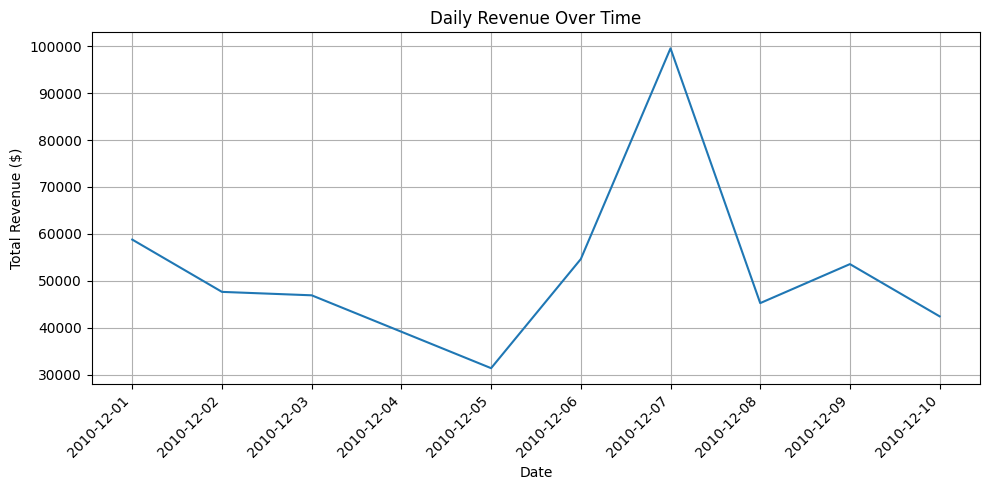

In [55]:
daily_revenue.plot(kind = "line", figsize = (10,5), title = "Daily Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue ($)")
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [56]:

hourly_patterns = sales_clean.groupby("Hour")["TotalAmount"].sum()
print(hourly_patterns)

Hour
7       467.00
8      4131.97
9     42146.14
10    53623.19
11    45284.36
12    52463.84
13    46154.75
14    63444.89
15    80499.51
16    66497.86
17    15742.38
18     8034.69
19     1251.04
20      300.64
Name: TotalAmount, dtype: float64


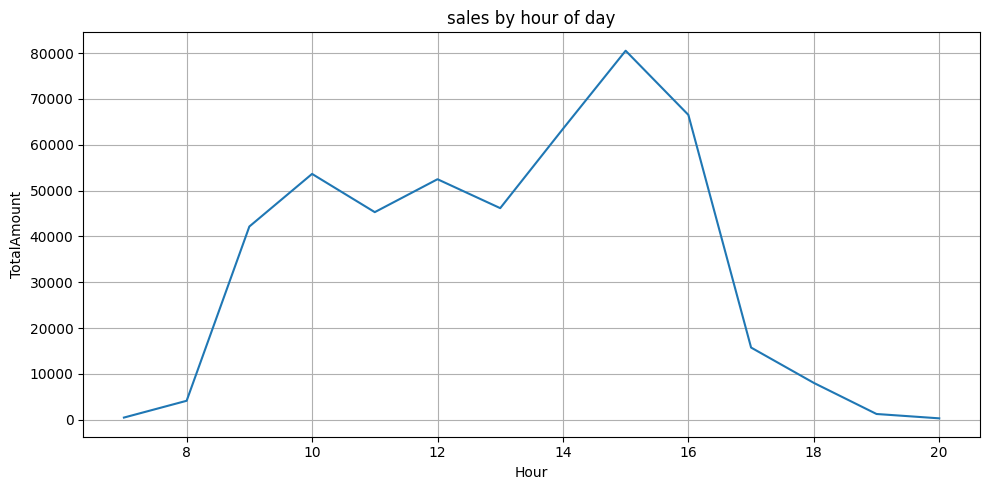

In [57]:
hourly_patterns.plot(kind = "line", figsize = (10,5), title = "sales by hour of day")
plt.xlabel("Hour")
plt.ylabel("TotalAmount") 
plt.grid(True)
plt.tight_layout()
plt.show()
                     

# Hourly Sales Analysis Summary
## Key Findings

 - Sales peak dramatically in the afternoon, with **3 PM generating the highest revenue ($80,499)**

 -  The core business window runs from **10 AM to 4 PM**, accounting for the majority of daily sales. 

 - Activity builds gradually through the morning, reaches maximum performance between **2-4 PM**, then drops sharply after 5 PM.

 -  Evening hours contribute minimal revenue, suggesting most business activity concludes by early evening.




In [58]:

#key findings


In [59]:
top_products = sales_clean.groupby("Description", observed = False)["TotalAmount"].sum().sort_values(ascending = False).head(10)
print(top_products)

Description
REGENCY CAKESTAND 3 TIER              17062.57
DOTCOM POSTAGE                        14558.26
AMAZON FEE                            13541.33
VINTAGE UNION JACK MEMOBOARD           6701.13
WHITE HANGING HEART T-LIGHT HOLDER     6078.96
WOOD BLACK BOARD ANT WHITE FINISH      6032.99
PAPER CHAIN KIT 50'S CHRISTMAS         5554.05
CREAM HEART CARD HOLDER                5280.32
BLACK HEART CARD HOLDER                5085.02
CHILLI LIGHTS                          4706.32
Name: TotalAmount, dtype: float64


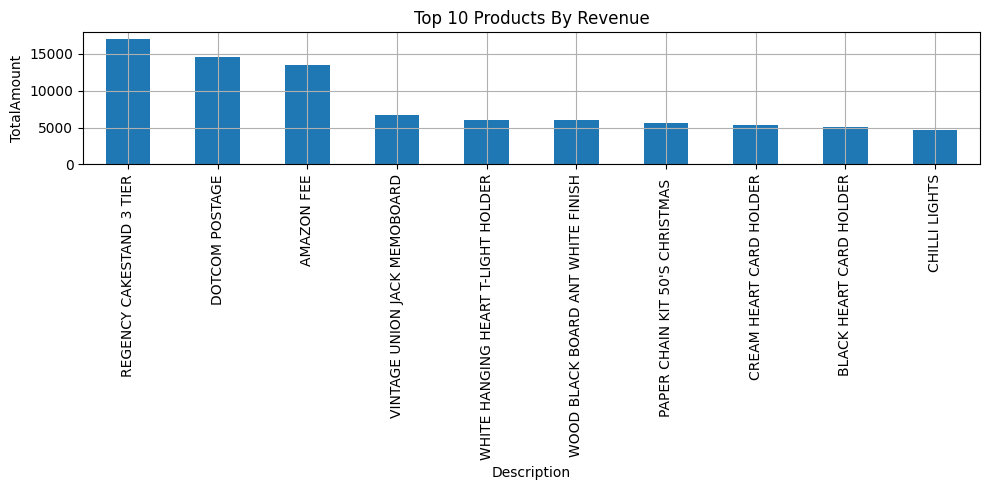

In [60]:
top_products.plot(kind = "bar", figsize = (10,5), title = "Top 10 Products By Revenue")
plt.ylabel("TotalAmount")
plt.xlabel("Description")
plt.grid(True)
plt.tight_layout()
plt.show()

## Key Findings: Top 10 Products by Total Sales
- The top-selling item is the Regency Cakestand 3 Tier, generating the highest revenue.
- Service fees like Dotcom Postage and Amazon Fee also contribute significantly to total sales.
-  The remaining top products are mainly home decor and seasonal items, showing strong customer interest in decorative and gift-related products.


## Customer Analysis

In [61]:

#Customer revenue Analysis
customer_revenue = sales_clean.groupby('CustomerID', observed = False)["TotalAmount"].sum().sort_values(ascending = False)
print(customer_revenue)

CustomerID
GUEST_CUSTOMER    143385.03
18102.0            27834.61
15061.0            17344.78
13777.0             6840.16
14911.0             5567.63
                    ...    
14576.0               35.40
17026.0               33.15
18225.0               30.00
17816.0               16.21
15823.0               15.00
Name: TotalAmount, Length: 609, dtype: float64


In [62]:
top_10_customers = customer_revenue.head(10)
print(top_10_customers)

CustomerID
GUEST_CUSTOMER    143385.03
18102.0            27834.61
15061.0            17344.78
13777.0             6840.16
14911.0             5567.63
17850.0             5391.21
16210.0             4738.54
16029.0             4271.52
12755.0             3794.40
12433.0             3787.12
Name: TotalAmount, dtype: float64


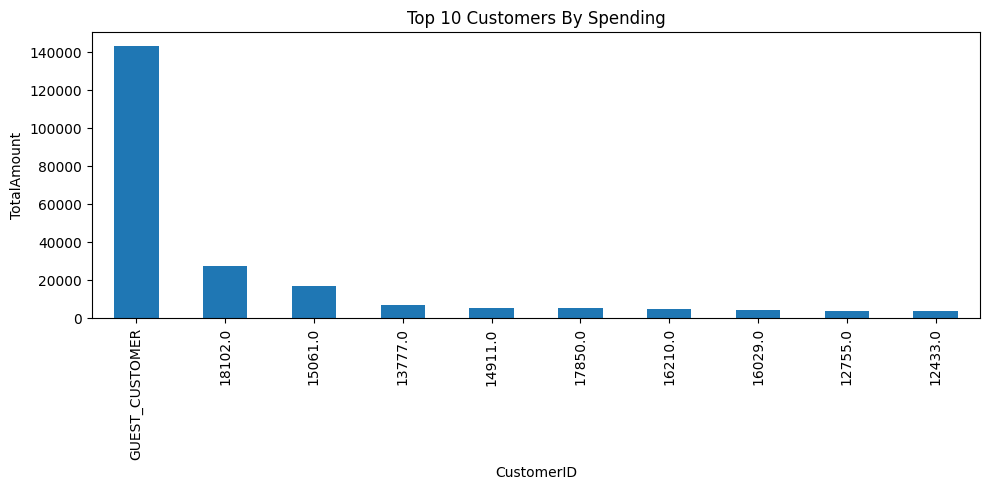

In [63]:
top_10_customers.plot(kind = "bar", figsize = (10,5), title = "Top 10 Customers By Spending")
plt.ylabel("TotalAmount")
plt.xlabel("CustomerID")
plt.tight_layout()
plt.show()

In [64]:
#Customer behavior metrics
customer_orders = sales_clean.groupby("CustomerID", observed = False)["InvoiceNo"].nunique()
print(customer_orders)

CustomerID
12347.0            1
12386.0            1
12395.0            1
12427.0            1
12429.0            1
                  ..
18229.0            2
18239.0            1
18259.0            1
18269.0            1
GUEST_CUSTOMER    62
Name: InvoiceNo, Length: 609, dtype: int64


In [65]:
costumer_frequency = sales_clean.groupby('CustomerID', observed = False).size()
print(costumer_frequency)

CustomerID
12347.0             31
12386.0              8
12395.0             12
12427.0             10
12429.0             20
                  ... 
18229.0             10
18239.0             29
18259.0              7
18269.0              7
GUEST_CUSTOMER    8730
Length: 609, dtype: int64


In [66]:
#Customer segments
threshold = customer_revenue.quantile(0.80).round()
high_value_customers = customer_revenue[customer_revenue >= threshold]
print(high_value_customers)

CustomerID
GUEST_CUSTOMER    143385.03
18102.0            27834.61
15061.0            17344.78
13777.0             6840.16
14911.0             5567.63
                    ...    
17377.0              588.30
15039.0              585.41
13468.0              582.23
15955.0              572.38
14282.0              571.00
Name: TotalAmount, Length: 122, dtype: float64


In [67]:
frequent_customers = customer_orders[customer_orders > 1]
print(frequent_customers)

CustomerID
12433.0            2
12471.0            2
12567.0            2
12647.0            3
12682.0            2
                  ..
18065.0            2
18102.0            4
18118.0            2
18229.0            2
GUEST_CUSTOMER    62
Name: InvoiceNo, Length: 119, dtype: int64


Regular       436
Gold-Tier      68
High-Value     54
Frequent       51
Name: count, dtype: int64


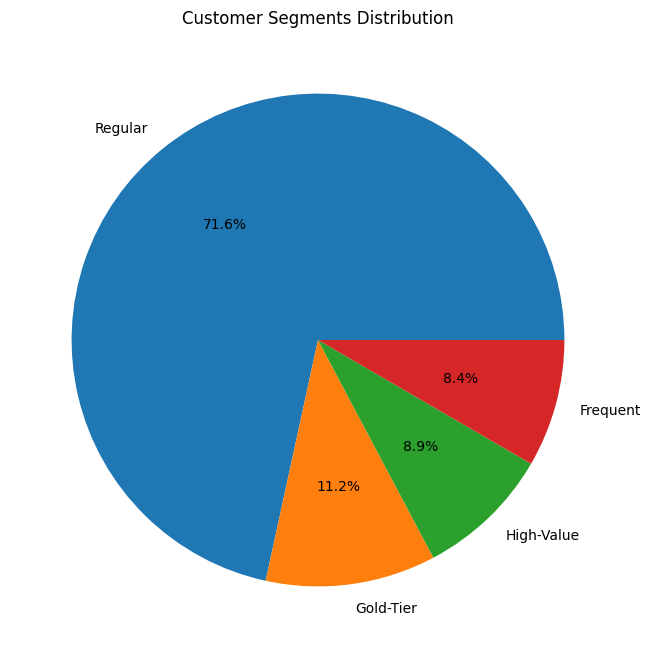

In [70]:

#Customer Segments Pie Chart
segments = []
for customer_id in customer_revenue.index:
    if customer_id in high_value_customers.index and customer_id in frequent_customers.index:
        segments.append('Gold-Tier')
    elif customer_id in high_value_customers.index:
        segments.append('High-Value')
    elif customer_id in frequent_customers.index:
        segments.append('Frequent')
    else:
        segments.append('Regular')

segment_counts = pd.Series(segments).value_counts()
print(segment_counts)


segment_counts.plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', 
                   title='Customer Segments Distribution')
plt.ylabel('')
plt.show()

# Customer Analysis - Key Findings

 ## Revenue Distribution

- GUEST_CUSTOMER: $143,385 (62 orders)
- Top registered: $27,835 (ID: 18102 - 4 orders)
- High-value threshold: $1,680

## Customer Segments

- Regular customers: 71.6% - standard buyers
- Gold-Tier: 11.2% - high spending + frequent orders
-High-Value: 8.9% - high spending but infrequent
- Frequent: 8.4% - frequent orders but low spending

## Key Insights

 - 20% of customers (Gold+High-Value) drive majority of revenue
 - Customer 18102 = ideal example (high value + frequency)
